In [4]:
import pandas as pd
import numpy as np



In [7]:
df_ganancias_sexoNacionalidad = pd.read_csv('..\data\Ganancia_anual_sexo&nac.csv', sep = '\t')
df_ganancias_sexoNacionalidad.head()

,Nacionalidad,Sexo,Periodo,Total
0,Total,Ambos sexos,2020,"25.165,51"
1,Total,Ambos sexos,2019,"24.395,98"
2,Total,Ambos sexos,2018,"24.009,12"
3,Total,Ambos sexos,2017,"23.646,5"
4,Total,Ambos sexos,2016,"23.156,34"


In [9]:
ganancias2021 = pd.read_csv("..\data\Salarios mes 2021 .csv", sep = '\t', encoding='Latin1')
ganancias2021[ganancias2021['Decil'] == 'Total decil']

,Nacionalidad,Tipo de jornada,Decil,Periodo,Total
0,Total,Jornada a tiempo completo,Total decil,2021,"2.313,13"
11,Española,Jornada a tiempo completo,Total decil,2021,"2.396,34"
22,Española y doble nacionalidad,Jornada a tiempo completo,Total decil,2021,"1.945,53"
33,Extranjera,Jornada a tiempo completo,Total decil,2021,"1.821,24"


In [10]:
df_ganancias_sexoNacionalidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Nacionalidad  273 non-null    object
 1   Sexo          273 non-null    object
 2   Periodo       273 non-null    int64 
 3   Total         273 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.7+ KB


## LIMPIEZA DE DATOS ##

lo primero que tengo que hacer es convertir la columna total a float con el que pueda trabajar

#nota: el '-' delante de los numeros (según leido en la documentacion de los datos procedentes de ine.es)significa una cantidad de muestreo mas reducida, pero no un numero negativo

In [11]:
#hay alguna manera más elegante de hacer esto?

df_ganancias_sexoNacionalidad['Total'] = df_ganancias_sexoNacionalidad['Total'].str.replace('.','')
df_ganancias_sexoNacionalidad['Total'] = df_ganancias_sexoNacionalidad['Total'].str.replace(',','.')
df_ganancias_sexoNacionalidad['Total'] = df_ganancias_sexoNacionalidad['Total'].str.replace('-','')


C:\Users\rivas\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
#por alguna razon, al hacer esto se me genera un NaN en muj 2009 otros paises
df_ganancias_sexoNacionalidad['Total'] = pd.to_numeric(df_ganancias_sexoNacionalidad['Total'])
df_ganancias_sexoNacionalidad['Total']





0      25165.51
1      24395.98
2      24009.12
3      23646.50
4      23156.34
         ...   
268    12887.57
269    12526.02
270    14229.75
271    12174.59
272    12774.99
Name: Total, Length: 273, dtype: float64

In [13]:
#arreglar el NaN 
df_ganancias_sexoNacionalidad[df_ganancias_sexoNacionalidad['Total'].isnull()]

,Nacionalidad,Sexo,Periodo,Total
258,Otros países,Mujeres,2009,NaN


In [14]:
#quiero arreglar el NaN con la media de los demás años en otros paises 'mujeres'. 
df_ganancias_sexoNacionalidad[(df_ganancias_sexoNacionalidad['Nacionalidad'] == 'Otros países') & (df_ganancias_sexoNacionalidad['Sexo'] == 'Mujeres')]['Total'].mean()



11856.730833333333

In [15]:
df_ganancias_sexoNacionalidad['Total'].fillna(df_ganancias_sexoNacionalidad[(df_ganancias_sexoNacionalidad['Nacionalidad'] == 'Otros países') & (df_ganancias_sexoNacionalidad['Sexo'] == 'Mujeres')]['Total'].mean(), inplace= True)
df_ganancias_sexoNacionalidad[(df_ganancias_sexoNacionalidad['Nacionalidad'] == 'Otros países') & (df_ganancias_sexoNacionalidad['Sexo'] == 'Mujeres')]

,Nacionalidad,Sexo,Periodo,Total
247,Otros países,Mujeres,2020,15742.510000
248,Otros países,Mujeres,2019,14444.860000
249,Otros países,Mujeres,2018,15127.930000
250,Otros países,Mujeres,2017,11144.560000
251,Otros países,Mujeres,2016,9459.960000
252,Otros países,Mujeres,2015,9269.160000
253,Otros países,Mujeres,2014,11108.650000
254,Otros países,Mujeres,2013,10073.560000
255,Otros países,Mujeres,2012,11486.400000
256,Otros países,Mujeres,2011,11355.960000


In [40]:
#convertimos periodo a string porque no me interesa tratar los años como int
# df_ganancias_sexoNacionalidad['Periodo'] = df_ganancias_sexoNacionalidad['Periodo'].to_string()

In [16]:
df_ganancias_sexoNacionalidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nacionalidad  273 non-null    object 
 1   Sexo          273 non-null    object 
 2   Periodo       273 non-null    int64  
 3   Total         273 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.7+ KB


In [112]:
#conversión hecha. Ahora puedo hacer un groupby y ver cosas interesantes



In [17]:
df_ganancias_sexoNacionalidad.Nacionalidad.value_counts()

Total                         39
Española                      39
País de la UE28 sin España    39
País de Europa menos UE28     39
De Africa                     39
De América                    39
Otros países                  39
Name: Nacionalidad, dtype: int64

In [18]:
pd.set_option('display.max_rows', 300)

In [19]:
df_grouped = pd.DataFrame(df_ganancias_sexoNacionalidad.groupby([('Nacionalidad'),('Sexo')], as_index=False).mean())
df_grouped
#Media por lugar de origen y sexo de 2008 a 2020

,Nacionalidad,Sexo,Periodo,Total
0,De Africa,Ambos sexos,2014.0,15283.835385
1,De Africa,Hombres,2014.0,16267.888462
2,De Africa,Mujeres,2014.0,12103.980000
3,De América,Ambos sexos,2014.0,14997.710769
4,De América,Hombres,2014.0,16623.798462
5,De América,Mujeres,2014.0,13079.199231
6,Española,Ambos sexos,2014.0,23711.827692
7,Española,Hombres,2014.0,26567.420769
8,Española,Mujeres,2014.0,20586.678462
9,Otros países,Ambos sexos,2014.0,13584.080769


In [20]:
df_ganancias_sexoNacionalidad.head()

,Nacionalidad,Sexo,Periodo,Total
0,Total,Ambos sexos,2020,25165.51
1,Total,Ambos sexos,2019,24395.98
2,Total,Ambos sexos,2018,24009.12
3,Total,Ambos sexos,2017,23646.50
4,Total,Ambos sexos,2016,23156.34


In [21]:
df_ganancias_sexoNacionalidad.groupby(['Periodo','Nacionalidad']).mean()

Total
Periodo Nacionalidad                            
2008    De Africa                   13727.660000
        De América                  13872.893333
        Española                    22271.040000
        Otros países                11531.070000
        País de Europa menos UE28   14336.993333
        País de la UE28 sin España  16609.030000
        Total                       21665.790000
2009    De Africa                   14626.326667
        De América                  14100.306667
        Española                    22853.713333
        Otros países                11966.543611
        País de Europa menos UE28   14260.880000
        País de la UE28 sin España  16988.690000
        Total                       22338.180000
2010    De Africa                   14711.856667
        De América                  14839.476667
        Española                    23224.333333
        Otros países                13780.076667
        País de Europa menos UE28   16450.946667
        País de la UE28 sin España  18479.363333
        Total                       22668.386667
2011    De Africa                   14877.810000
        De América                  14803.553333
        Española                    23319.046667
        Otros países                12050.176667
        País de Europa menos UE28   16865.826667
        País de la UE28 sin España  17739.256667
        Total                       22778.276667
2012    De Africa                   14350.733333
        De América                  14626.030000
        Española                    23159.836667
        Otros países                12271.213333
        País de Europa menos UE28   14710.400000
        País de la UE28 sin España  17376.920000
        Total                       22648.606667
2013    De Africa                   13753.813333
        De América                  14200.920000
        Española                    23122.443333
        Otros países                11629.086667
        País de Europa menos UE28   15306.353333
        País de la UE28 sin España  17907.673333
        Total                       22629.203333
2014    De Africa                   14180.720000
        De América                  14884.463333
        Española                    23170.520000
        Otros países                13041.813333
        País de Europa menos UE28   15567.433333
        País de la UE28 sin España  20219.003333
        Total                       22776.743333
2015    De Africa                   14212.940000
        De América                  14563.000000
        Española                    23499.093333
        Otros países                11995.340000
        País de Europa menos UE28   15827.230000
        País de la UE28 sin España  19070.456667
        Total                       23050.213333
2016    De Africa                   13425.633333
        De América                  14531.210000
        Española                    23538.093333
        Otros países                12608.913333
        País de Europa menos UE28   15718.776667
        País de la UE28 sin España  18764.213333
        Total                       23070.726667
2017    De Africa                   13918.226667
        De América                  15192.936667
        Española                    24035.583333
        Otros países                13302.683333
        País de Europa menos UE28   16447.643333
        País de la UE28 sin España  19805.086667
        Total                       23548.730000
2018    De Africa                   15603.196667
        De América                  16319.640000
        Española                    24369.510000
        Otros países                16141.273333
        País de Europa menos UE28   16858.016667
        País de la UE28 sin España  20841.193333
        Total                       23919.733333
2019    De Africa                   15722.110000
        De América                  15733.043333
        Española                    24889.876667
        Otros países     

### Gráficas y correlaciones ###


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot

In [22]:
df_ganancias_sexoNacionalidad.head()

,Nacionalidad,Sexo,Periodo,Total
0,Total,Ambos sexos,2020,25165.51
1,Total,Ambos sexos,2019,24395.98
2,Total,Ambos sexos,2018,24009.12
3,Total,Ambos sexos,2017,23646.50
4,Total,Ambos sexos,2016,23156.34


In [59]:
df_nac = df_ganancias_sexoNacionalidad.groupby(['Nacionalidad','Periodo'], as_index=False).mean()


In [26]:
#quiero hacer un trace para cada nacionalidad, pruebo si con africa sale

df_gender = df_ganancias_sexoNacionalidad[df_ganancias_sexoNacionalidad['Sexo'] == 'Ambos sexos']
both_genders_nac_grouped = df_gender.groupby(['Nacionalidad','Periodo'], as_index=False).mean()
both_genders_nac_grouped['Nacionalidad'].unique()

array(['De Africa', 'De América', 'Española', 'Otros países',
       'País de Europa menos UE28', 'País de la UE28 sin España', 'Total'],
      dtype=object)

In [73]:
#vamos a ver si funciona lo de arriba
trace1 = go.Scatter(x = both_genders_nac_grouped[both_genders_nac_grouped['Nacionalidad'] == 'De Africa']['Periodo'], y= both_genders_nac_grouped[both_genders_nac_grouped['Nacionalidad'] == 'De Africa']['Total'], mode="lines", name="De Africa")
trace2 = go.Scatter(x = both_genders_nac_grouped[both_genders_nac_grouped['Nacionalidad'] == 'Española']['Periodo'], y= both_genders_nac_grouped[both_genders_nac_grouped['Nacionalidad'] == 'Española']['Total'], mode="lines", name="Española")
trace3 = go.Scatter(x = both_genders_nac_grouped[both_genders_nac_grouped['Nacionalidad'] == 'De América']['Periodo'], y= both_genders_nac_grouped[both_genders_nac_grouped['Nacionalidad'] == 'De América']['Total'], mode="lines", name="De América")
trace4 = go.Scatter(x = both_genders_nac_grouped[both_genders_nac_grouped['Nacionalidad'] == 'Otros países']['Periodo'], y= both_genders_nac_grouped[both_genders_nac_grouped['Nacionalidad'] == 'Otros países']['Total'], mode="lines", name="Otros países")
trace5 = go.Scatter(x = both_genders_nac_grouped[both_genders_nac_grouped['Nacionalidad'] == 'País de Europa menos UE28']['Periodo'], y= both_genders_nac_grouped[both_genders_nac_grouped['Nacionalidad'] == 'País de Europa menos UE28']['Total'], mode="lines", name="Europa sin UE28")
trace6 = go.Scatter(x = both_genders_nac_grouped[both_genders_nac_grouped['Nacionalidad'] == 'País de la UE28 sin España']['Periodo'], y= both_genders_nac_grouped[both_genders_nac_grouped['Nacionalidad'] == 'País de la UE28 sin España']['Total'], mode="lines", name="Europa UE28 sin España")
trace7 = go.Scatter(x = both_genders_nac_grouped[both_genders_nac_grouped['Nacionalidad'] == 'Total']['Periodo'], y= both_genders_nac_grouped[both_genders_nac_grouped['Nacionalidad'] == 'Total']['Total'], mode="lines", name="Total")



data = [trace1,trace2, trace3, trace4, trace5, trace6, trace7]


layout = dict(title = "Ingresos por año y nacionalidad", xaxis = dict(title="Año"))

fig = dict(data=data, layout=layout)

iplot(fig)

Text(0.5, 1.0, 'Regresión lineal salarios')

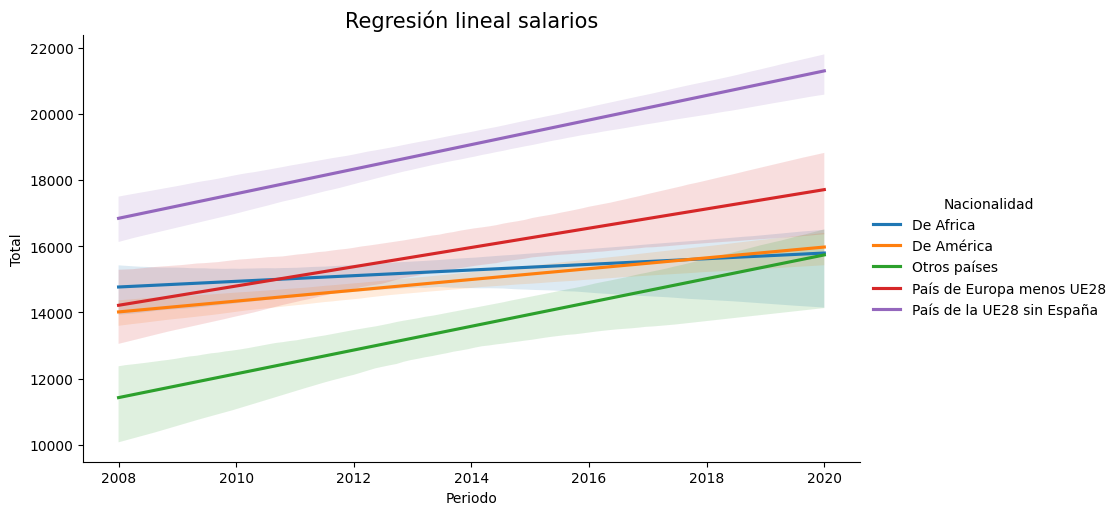

In [71]:
#tabla regresion lineal sin españa y total para tener un mejorado foco en inmigracion
#puedo quitar los puntos? suuuuu
sns.lmplot(data=both_genders_nac_grouped[(both_genders_nac_grouped['Nacionalidad'] != 'Española') & (both_genders_nac_grouped['Nacionalidad'] != 'Total')], x="Periodo", y="Total", hue = 'Nacionalidad', scatter=False
,aspect=1.8)
plt.title('Regresión lineal salarios', fontsize=15) 


In [103]:
import plotly.express as px

fig = px.scatter(both_genders_nac_grouped, x="Periodo", y="Total", color="Nacionalidad", trendline='ols')
# fig.update_traces(selector=dict(mode='markers'), visible = False, )
fig.show()